**Shifted Schwefel Function**

Environment : Python 3.8.2 & Jupyter Notebook<br>

The objective is to solve unconstrained problem : F2 as described in the “CEC2008_TechnicalReport.pdf” for both dimensions D = 50 and D = 500. <br>
F2: Shifted Schwefel<br>

The coordinates of the shifted global minimum of this function in dim = 1000 are provided in a numpy array in a data file "data.py". These are the target coordinates to be achieved.<br>
F2: schwefeldat -> shape = (1000,) <br>

The fitness or value of this function at its minimum is also available in numpy array "f_bias" in "data.py". This is the the target fitness value to achieve.<br>
f_bias[1] = F2_min = -450
<img src="Functions.png">

Import Libraries

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

from psopy import minimize as minimize_pso

**Import Data**

In [2]:
# Import data in data.py file and print shape of input arrays
from data import *
print(spheredat.shape)
print(f_bias[0])

(1000,)
-450.0


- Algorithm : Particle Swarm Optimization - The shifted schwefel function is not differentiable throughout the search space. As such, a gradient-based method produces unstable results and does not guarantee convergence. The heuristic-based PSO algorithm is suitable for this unconstrained, non-linear, unimodal problem in the continuous domain.
- Library : psopy
- Parameters of the algorithm : Number of particles, stable_iter(Number of iterations to wait before Swarm is declared stable) 
- Stopping criterion : stable_iter = 100
- Number of function evaluations : see below
- Computational time : see below
- Convergence curve : see below
- Final results (solution and fitness) : see below

In [8]:
# Define objective function to minimize
def Shifted_Schwefel(x):
    return f_bias[1] + np.max(np.abs(x[:dim] - schwefeldat[:dim]))


def Minimize_PSO(func, targetmin=None, nb_particles=None, stable_iter=None, self_confid=None, swarm_confid=None, 
                 bounds_min = None, bounds_max = None):
    """ Minimize func using Particle Swarm Optimization with a given particle self confidence and swarm condifence
        Stopping condition : Maximum change in best fitness smaller than default tol=1e-6 for stable_iter iterations"""
    
    print("Number of dimensions : {}".format(dim))
    
    since = time.time()
    
    # Generate nb_particles particles of dimension dim, with coordinates between min and max
    x0 = np.random.uniform(bounds_min, bounds_max, (nb_particles, dim))
    
    # Run Particle Swarm Optimization
    res = minimize_pso(func, x0, options={'stable_iter': stable_iter, 'l_rate':self_confid, 'g_rate':swarm_confid, 
                       'verbose' : False, 'savefile': "output.csv"})
    
    # Show results
    print("Computational time : {:.2f} s".format(time.time()-since))
    print("Fitness at minimum (result): {:.4f} ".format(res.fun))
    print("Fitness at minimum (real): {:.4f} ".format(targetmin))
    print("Function evaluations : {}".format(res.nit*nb_particles))

    converg = pd.read_csv("output.csv", sep=",")
    plt.plot(converg.Iter+1, converg.Func, label="Convergence curve")
    plt.axhline(y=targetmin, color="r", label="Actual Minimum = "+str(targetmin))
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.show()
    
    print("x_minimum :\n{}".format(res.x))

D = 50

Number of dimensions : 50
Computational time : 7.40 s
Fitness at minimum (result): -441.8128 
Fitness at minimum (real): -450.0000 
Function evaluations : 249750


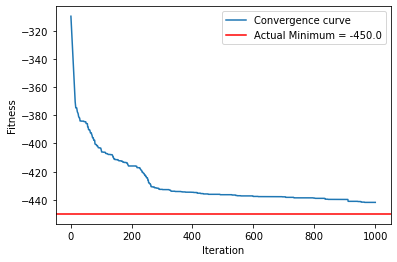

x_minimum :
[-19.87414206 -13.09618858 -48.78608444 -89.45793024 -11.61552426
 -46.78827229  -9.35377624 -76.85272102 -75.45464074 -52.94315068
 -56.94729164 -49.11554115   3.41161909 -21.96705635 -87.73736031
 -49.31297693 -57.10031876 -37.08419746 -72.09046984 -70.57978355
 -41.47921129 -70.75539197 -64.2279208  -51.50731675  -0.44941133
 -38.95369758 -16.31064998 -64.58303471 -49.90298768 -41.08437585
 -75.56854564 -64.01749075 -45.86488324 -69.69526337 -96.86804094
 -78.18218771 -88.66560114 -45.93297462 -54.26834477 -56.78776964
   0.28570537 -64.6119642  -29.44264464 -47.52108393  -9.62298489
 -74.69731061  -6.65283984 -59.91274354 -35.18143546 -76.81853892]


In [10]:
dim = 50

Minimize_PSO(Shifted_Schwefel, targetmin=f_bias[1], nb_particles=250, stable_iter=100, self_confid=15, swarm_confid=0.8,
            bounds_min = -100, bounds_max = 100)

D = 500

Number of dimensions : 500
Computational time : 25.92 s
Fitness at minimum (result): -357.8799 
Fitness at minimum (real): -450.0000 
Function evaluations : 506400


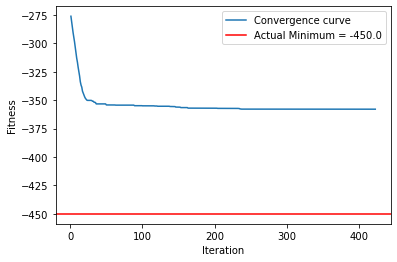

x_minimum :
[ 2.74424652e+01 -1.28471418e+01  9.94096665e+00 -7.91861709e+00
  1.48102177e+01  2.39177647e+01 -3.92189877e+00  6.57910604e+00
 -2.62882947e+00  4.67135538e-01 -4.06855958e+00 -1.07632614e+01
  1.58983285e+01 -3.93350572e+00  3.95168490e+00  8.16847825e+00
 -2.38587325e+00 -3.65493717e+00  1.16345001e+01  1.50567669e+01
  1.95087098e+01 -5.40021703e-01 -8.62842468e+00 -6.46345427e+00
  2.33048795e+00  9.89018628e+00  1.32719463e+01 -1.52026412e+01
 -2.24971842e+01 -9.06011121e+00  1.29593542e+01  1.20674837e+01
  1.09411307e+01 -1.94545866e+01 -6.13598203e+00  8.73284382e+00
 -1.51509088e+01 -2.26504155e+01 -1.96886036e+01  5.14383912e+00
 -1.95043072e+01 -1.76389071e+01  1.67471726e+01 -2.61859497e+01
  1.01229763e+01 -1.14316501e-01 -1.06945268e+01  4.31436281e+00
 -1.92135081e+00 -5.68765692e+00  3.95752701e+01 -1.94954727e+01
  2.02178325e+01  1.12155291e+01  1.61854922e-01 -2.03622942e+01
 -1.06060398e+01 -4.80344148e+00 -5.01592592e+00 -5.06439872e+00
  2.20553084e

In [6]:
dim = 500

Minimize_PSO(Shifted_Schwefel, targetmin=f_bias[1], nb_particles=1200, stable_iter=100, self_confid=2, swarm_confid=15,
            bounds_min = -100, bounds_max = 100)

PSO applied to the Shifted Schwefel function performs much better for D = 50 than for D = 500.